### Lecture 13 
Today we move onto a new topic: how to draw fractals

### Numpy

Numpy is a commonly used python module for dealing with vectors and matrices.

In [ ]:
import numpy as np

In [ ]:
!pip3 install drawSvg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 45 kB 2.7 MB/s 
     |████████████████████████████████| 69 kB 4.8 MB/s 
  Created wheel for cairocffi: filename=cairocffi-1.4.0-py3-none-any.whl size=88775 sha256=7a9fe95ac8cf76cc40152a58236d75f6595e116d4dd77fcc5061412ce0b61dbe
  Stored in directory: /root/.cache/pip/wheels/7a/2b/da/aec872f95d2c24105496ef149a9a576f52daf686f8f2127541
Successfully built cairocffi


In [ ]:
# Convenience funmatrix =ctions. You shouldn't need to change these
import drawSvg as draw
import numpy as np
import math
def drawLine(canvas, start, end, strokewidth):
    canvas.append(
        draw.Lines(
            start[0],
            start[1],
            end[0],
            end[1],
            close=False,
            fill="black",
            stroke="black",
            stroke_width=strokewidth,
        )
    )


def drawLines(lines, width, height, center, strokeWidth=0.03):
  '''
  Input:
    lines --  a list of lines. Each line is a 2x2  numpy array
              [[startx, endx], [starty, endy]]

    width -- width of the view
    height -- height of the view
    center -- pair of numbers (x,y) specifying
              which point should be in the center of the view

    strokeWidth -- optional. Default is 0.03

  Returns
    canvas -- canvas object containing those lines. Note: you should call
    canvas.rasterize() to see the drawing.

  '''
  origin = (center[0]-width/2,center[1]-height/2)
  canvas = draw.Drawing(width, height, origin=origin)
  canvas.setRenderSize(900)  
  for line in lines:
    drawLine(canvas, (line[0][0], line[1][0]),(line[0][1], line[1][1]), strokewidth=strokeWidth)
  return canvas


### Example usage:
# line = np.array([[0,1],[0,4]]) # Line from 0,0, to 1,4
# lines = [line]
# drawLines(line).rasterize()

### Review: matrix transformations 

1. Write a function 'def rotationMatrix(theta)' that returns the rotation matrix 
for angle theta (in radians).

2. Write a function 'def translate(vec, dir)' that returns the vector vec
translated by direction dir.





In [ ]:
import math
#counter-clockwise rotation
def rotation_matrix(theta):
  return np.array([[math.cos(theta), -math.sin(theta)], 
                   [math.sin(theta), math.cos(theta)]])

In [ ]:
def rotate(vec, theta):
  return rotation_matrix(theta) @ vec

#### Line representations

How should we represent a line segment? A line segment is specified by the 
start point and the end point, so 4 numbers in total. 
But how should we arrange them? [startx, starty, endx, endy]? 
It turns out to be convenient to represent them in an matrix 
[
  [startx, starty],
 [endx, endy]
 ]
 
 This is because if we want to rotate both coordinates of the line, we can 
 just do rotMatrix @ line.

 3. Write a function 'def translate(line, dir)' that returns the representation of line, translated in the direction dir.
 For example, translate([[0,1],[0,2]],[dx,dy]]) means translate 
 the line from (0,1/3) to (1,2)    in the direction (dx,dy).
 So the result should be the line from (dx, 1/3+dy) to (1+dx, 2+dy),
 i.e. [[dx, 1+dx],[1/3+dy, 2+dy]]


In [ ]:
def translate(line, dir):
  dx = dir[0]
  dy = dir[1]
  return line + np.array([[dx, dx],
                         [dy, dy]])

In [ ]:
def draw_cantor(n):
  if n == 0:
    line = np.array(
        [[0,1],
        [0,0]]
        )
    return [line]
  
  prev_lines = draw_cantor(n-1)
  new_lines = []
  
  for line in prev_lines:
    scaled = line/3
    new_lines.append(scaled)
    new_lines.append(translate(scaled, [2/3, 0]))
  
  return new_lines

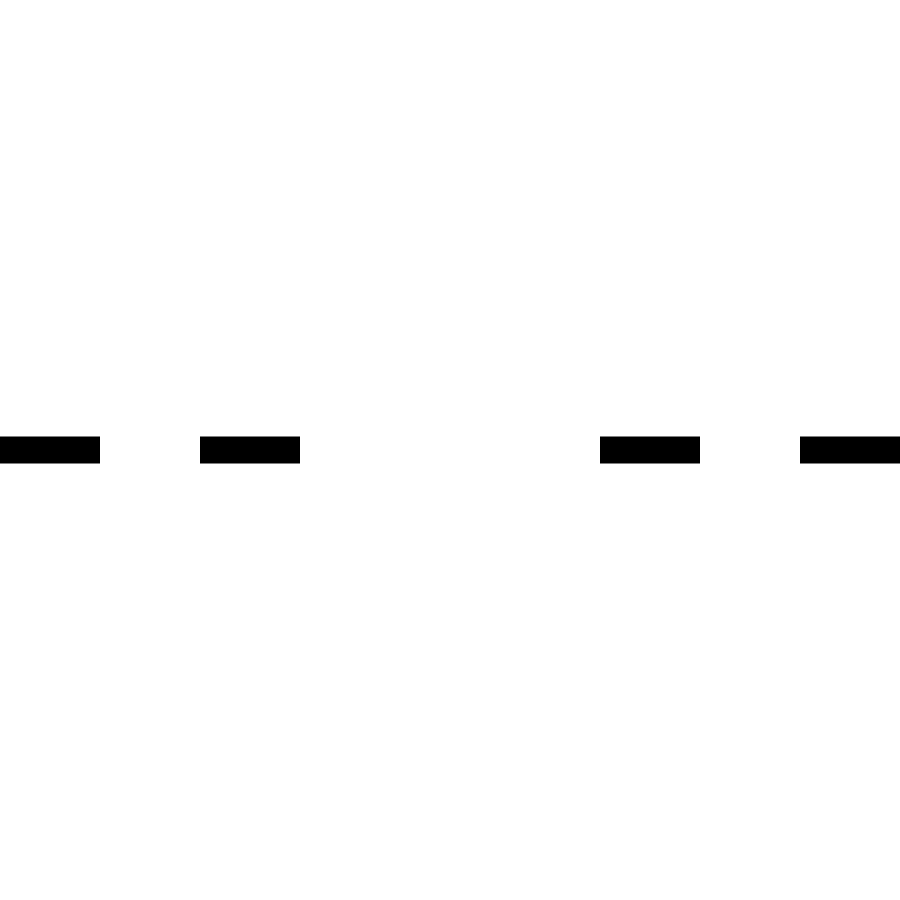

In [ ]:
drawLines(draw_cantor(2), 1, 1, (0.5, 0))

In [ ]:
def snowflake(n):
  if n == 0:
    lines = []
    line_1 = np.array(
        [[0,1],
        [0,0]]
        )
    lines.append(line_1)
    line_2 = rotate(line_1, 3.14/3)
    lines.append(line_2)
    line_3 = translate(rotate(line_1, -3.14/3), [1, 0])
    lines.append(line_3)
    return lines
  
  prev_lines = snowflake(n-1)
  new_lines = []
  
  for line in prev_lines:
    scaled = line/3
    new_lines.append(scaled)
    rotate_one = translate(rotate(scaled, 3.14/3), [1/3, 0])
    new_lines.append(rotate_one)
    rotate_two = translate(rotate(scaled, -3.14/3), [1/2, 3**0.5/6])
    new_lines.append(rotate_two)
    new_lines.append(translate(scaled, [2/3, 0]))
  
  return new_lines

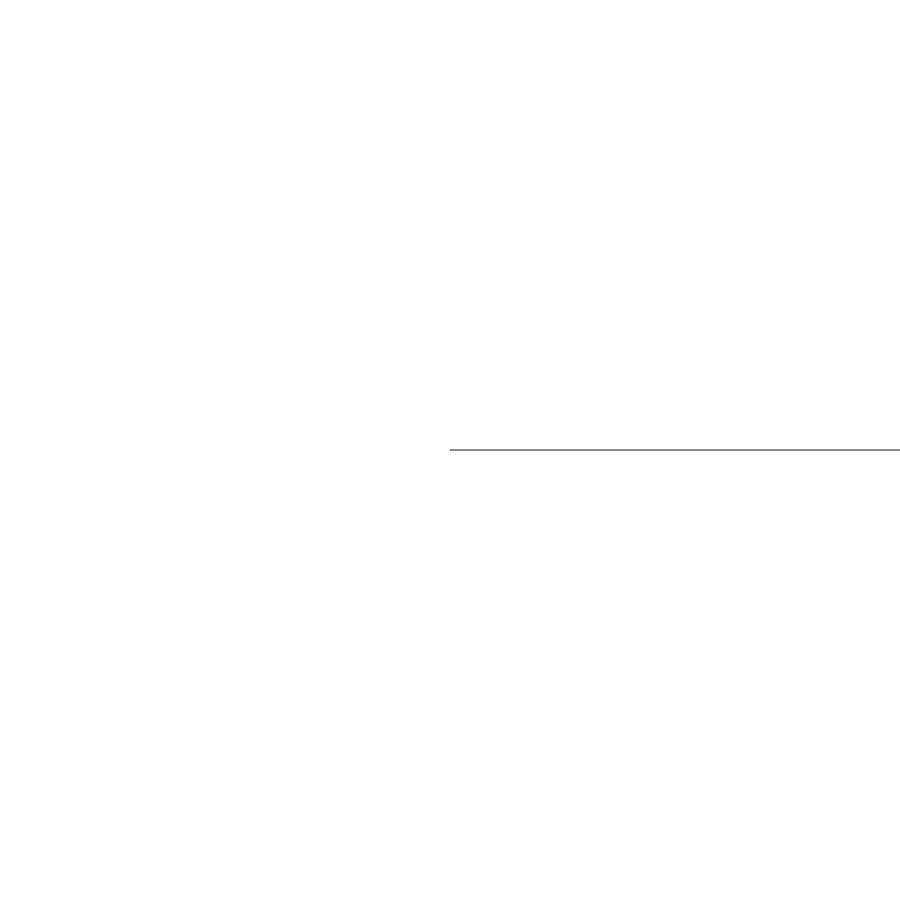

In [ ]:
drawLines(snowflake(0), 1, 1, (0, 0), 0.001)